In [ ]:
!pip install wordcloud

In [ ]:
!pip install sentence-transformers

In [ ]:
import zipfile
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import ipywidgets as widgets
from IPython.display import display

In [ ]:
# --- Step 1: Loading and preparing data ---
zip_path = 'final_perfume_data.csv.zip'
extract_path = '/content/perfume-dataset/'
csv_path = '/content/perfume-dataset/final_perfume_data.csv'

if not os.path.exists(csv_path):
    print(f"CSV file not found. Unzipping {zip_path}...")
    if not os.path.exists(zip_path):
        print(f"CRITICAL ERROR: File {zip_path} has not been uploaded!")
        print("Please upload the file and run again.")
    else:
        os.makedirs(extract_path, exist_ok=True)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"File unzipped to {extract_path}")
else:
    print("CSV file already exists.")

try:
    df = pd.read_csv(csv_path, encoding='latin1')
    print("Data loaded successfully.")
except Exception as e:
    print(f"ERROR while loading: {e}")

CSV file not found. Unzipping final_perfume_data.csv.zip...
CRITICAL ERROR: File final_perfume_data.csv.zip has not been uploaded!
Please upload the file and run again.
ERROR while loading: [Errno 2] No such file or directory: '/content/perfume-dataset/final_perfume_data.csv'


In [ ]:
# --- Step 1: Loading and preparing data ---
zip_path = 'final_perfume_data.csv.zip'
extract_path = '/content/perfume-dataset/'
csv_path = '/content/perfume-dataset/final_perfume_data.csv'

if not os.path.exists(csv_path):
    print(f"CSV file not found. Unzipping {zip_path}...")
    if not os.path.exists(zip_path):
        print(f"CRITICAL ERROR: File {zip_path} has not been uploaded!")
        print("Please upload the file and run again.")
    else:
        os.makedirs(extract_path, exist_ok=True)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"File unzipped to {extract_path}")
else:
    print("CSV file already exists.")

try:
    df = pd.read_csv(csv_path, encoding='latin1')
    print("Data loaded successfully.")
except Exception as e:
    print(f"ERROR while loading: {e}")

CSV file not found. Unzipping final_perfume_data.csv.zip...
File unzipped to /content/perfume-dataset/
Data loaded successfully.


In [ ]:
# --- Step 2: Text Processing (Common Step) ---
print("Processing scent notes...")
df['Notes'] = df['Notes'].fillna('')
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[\d\.,]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df['clean_notes'] = df['Notes'].apply(clean_text)
print("Column 'clean_notes' created.")

Processing scent notes...
Column 'clean_notes' created.


Generating Chart: Top 20 Brands...


/tmp/ipython-input-88725759.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


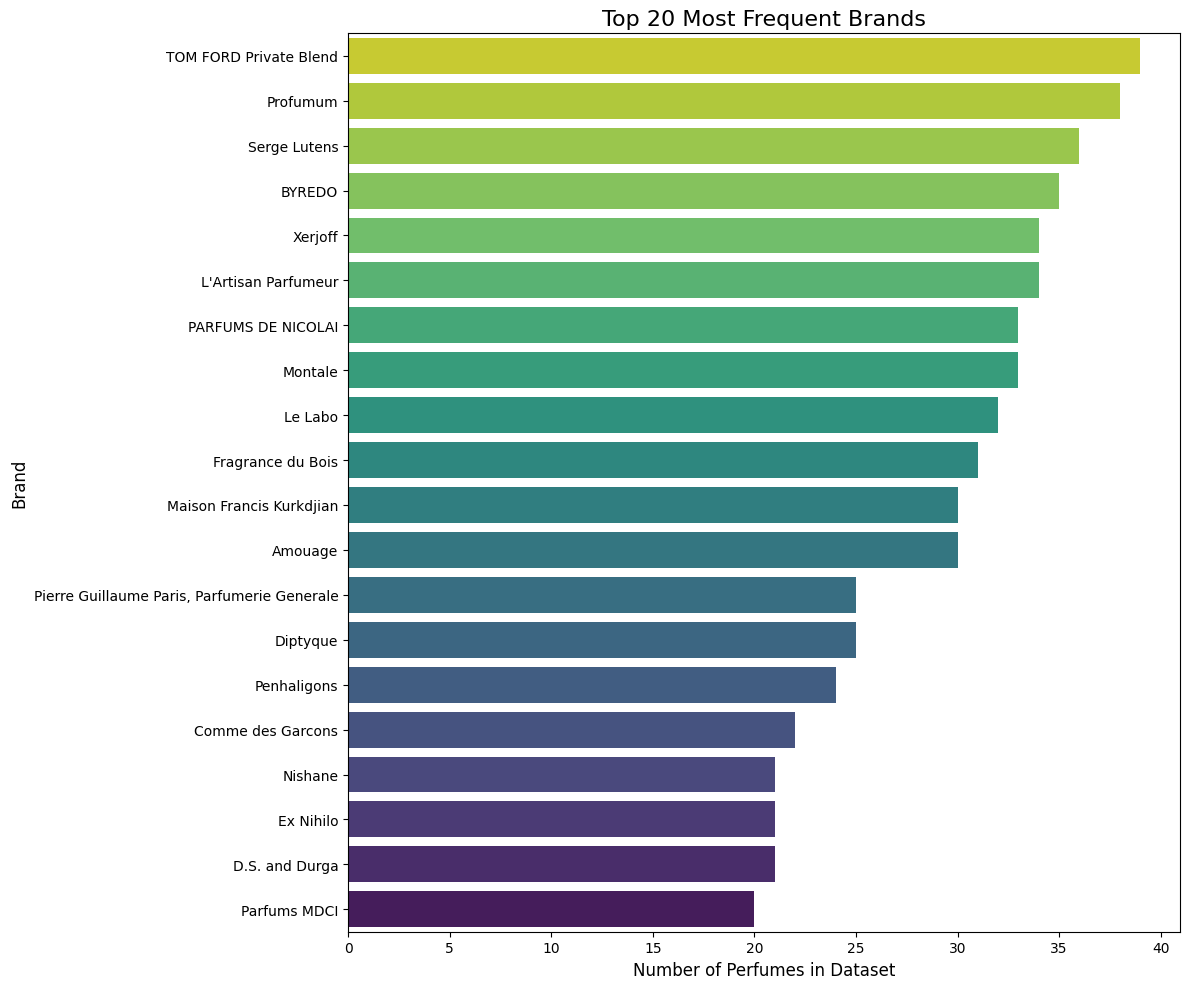

In [ ]:
# --- EDA Chart 1: Top 20 Brands ---
print("Generating Chart: Top 20 Brands...")
plt.figure(figsize=(12, 10))
brand_counts = df['Brand'].value_counts().head(20)
sns.barplot(
    x=brand_counts.values,
    y=brand_counts.index,
    palette="viridis_r"
)
plt.title('Top 20 Most Frequent Brands', fontsize=16)
plt.xlabel('Number of Perfumes in Dataset', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.tight_layout()
plt.savefig('top_20_brands_chart.png')
plt.show()

Generating Chart: Top 20 Scent Notes...


/tmp/ipython-input-670296970.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


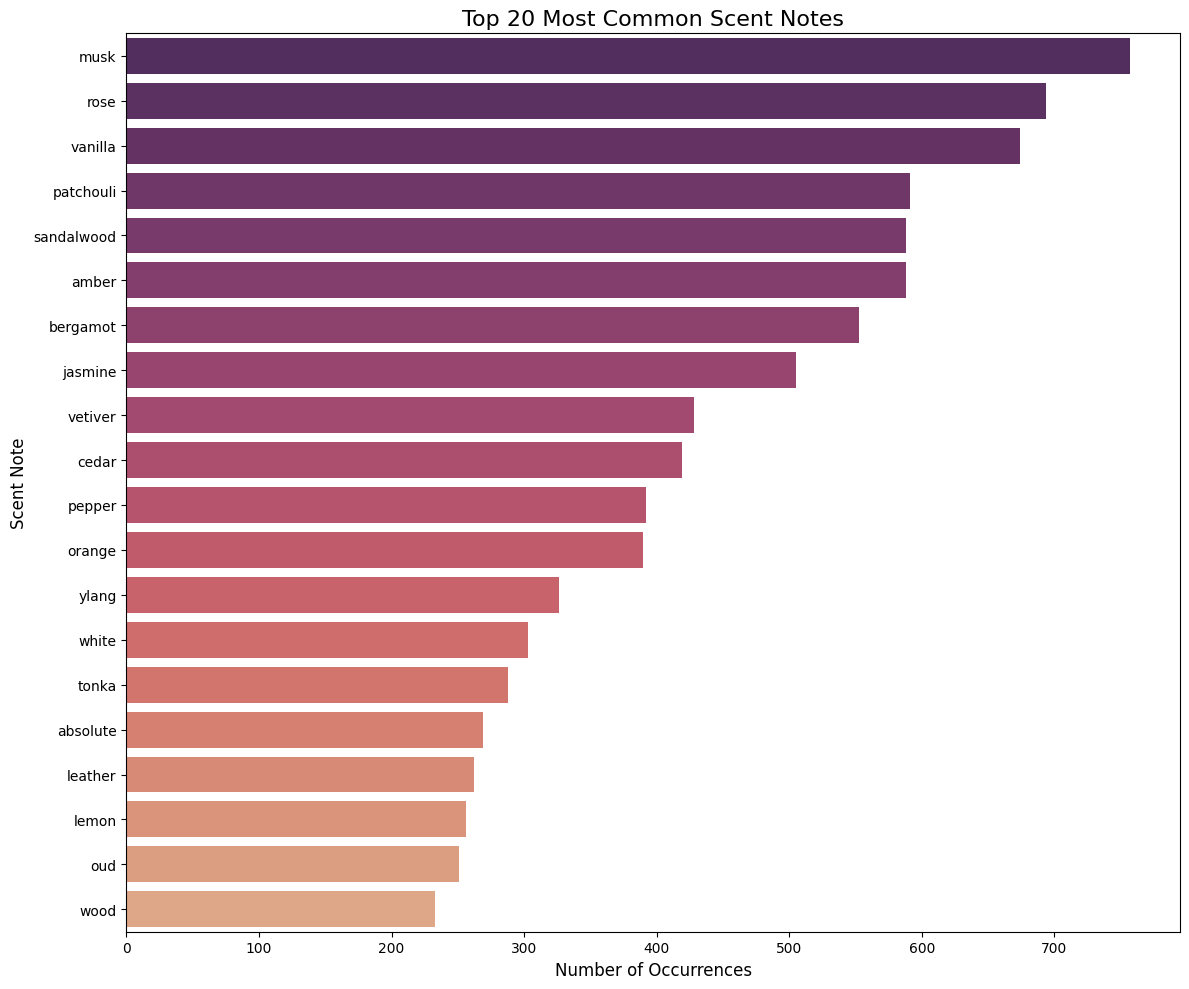

In [ ]:
# --- EDA Chart 2: Top 20 Scent Notes ---
print("Generating Chart: Top 20 Scent Notes...")
count_vec = CountVectorizer(stop_words='english')
count_matrix = count_vec.fit_transform(df['clean_notes'])
note_counts = count_matrix.sum(axis=0).A1
note_names = count_vec.get_feature_names_out()
notes_df = pd.DataFrame({'Note': note_names, 'Count': note_counts})
top_20_notes = notes_df.sort_values(by='Count', ascending=False).head(20)

plt.figure(figsize=(12, 10))
sns.barplot(
    x='Count',
    y='Note',
    data=top_20_notes,
    palette="flare_r"
)
plt.title('Top 20 Most Common Scent Notes', fontsize=16)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Scent Note', fontsize=12)
plt.tight_layout()
plt.savefig('top_20_notes_chart.png')
plt.show()

Generating Chart: Scent Note Word Cloud...


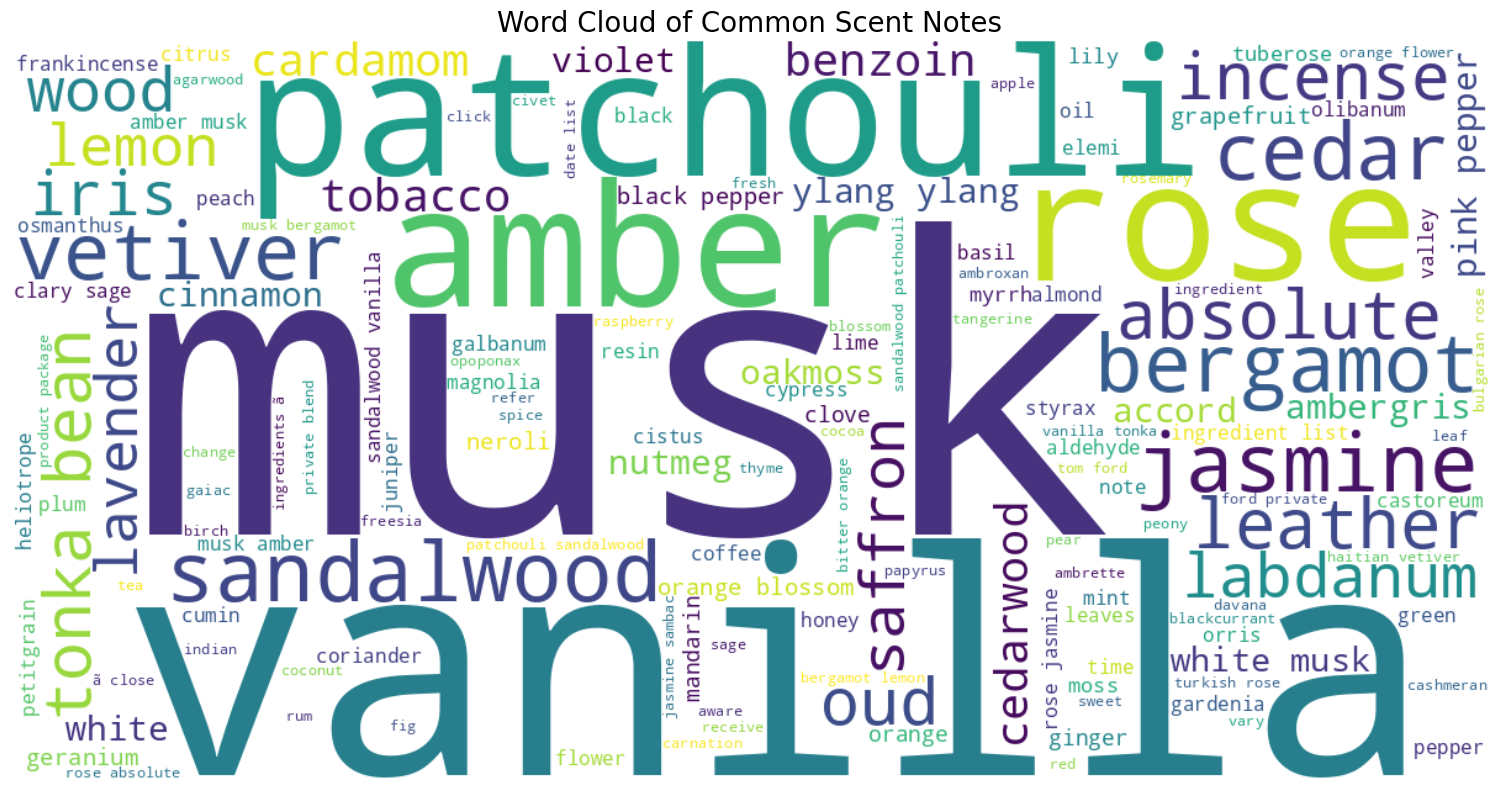

In [ ]:
# --- EDA Chart 3: Scent Note Word Cloud ---
print("Generating Chart: Scent Note Word Cloud...")
all_notes_text = " ".join(df['clean_notes'])

wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    stopwords=ENGLISH_STOP_WORDS,
    colormap='viridis',
    max_words=150
).generate(all_notes_text)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Scent Notes', fontsize=20)
plt.tight_layout()
plt.savefig('notes_wordcloud.png')
plt.show()

Starting Clustering Process...
TF-IDF matrix for clustering is ready.
Finding optimal k (Elbow Method)...


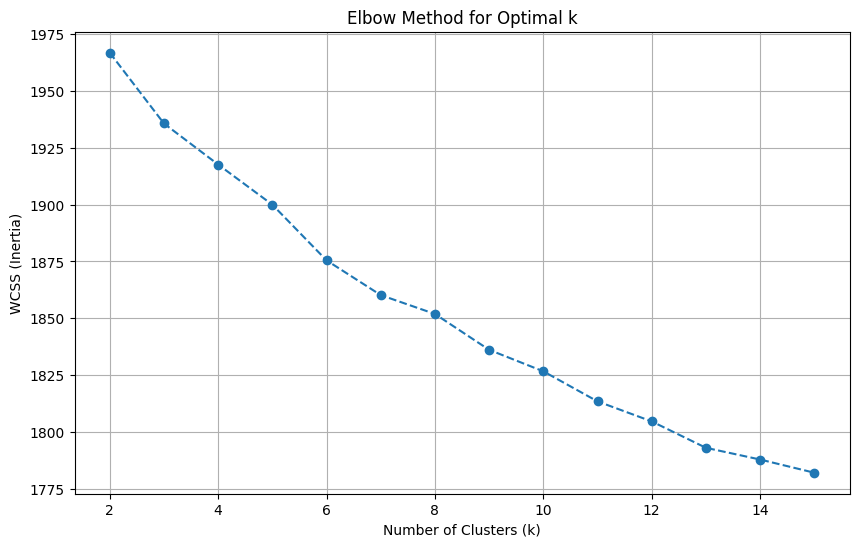

Elbow plot saved. We will proceed with k=8.
Running K-Means for k=8...
Clustering finished. 'Cluster' column added.

--- Cluster Analysis: Top 5 Notes per Cluster ---
Cluster 0: ylang, jasmine, sandalwood, rose, vanilla
Cluster 1: vanilla, vetiver, musk, jasmine, cedar
Cluster 2: ingredients, list, time, ingredient, vary
Cluster 3: green, leaves, notes, tea, musk
Cluster 4: wood, cedar, guaiac, amber, musk
Cluster 5: orange, blossom, musk, bergamot, amber
Cluster 6: patchouli, amber, rose, sandalwood, musk
Cluster 7: absolute, rose, oil, tonka, musk

Generating Chart: Cluster Size Distribution...


/tmp/ipython-input-4161909138.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette="viridis")


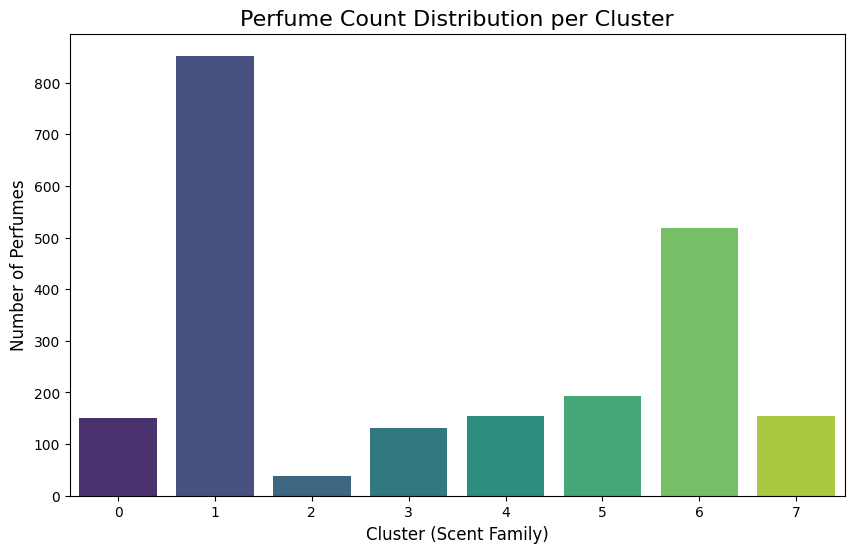

Generating Chart: 2D Cluster Visualization (PCA)...


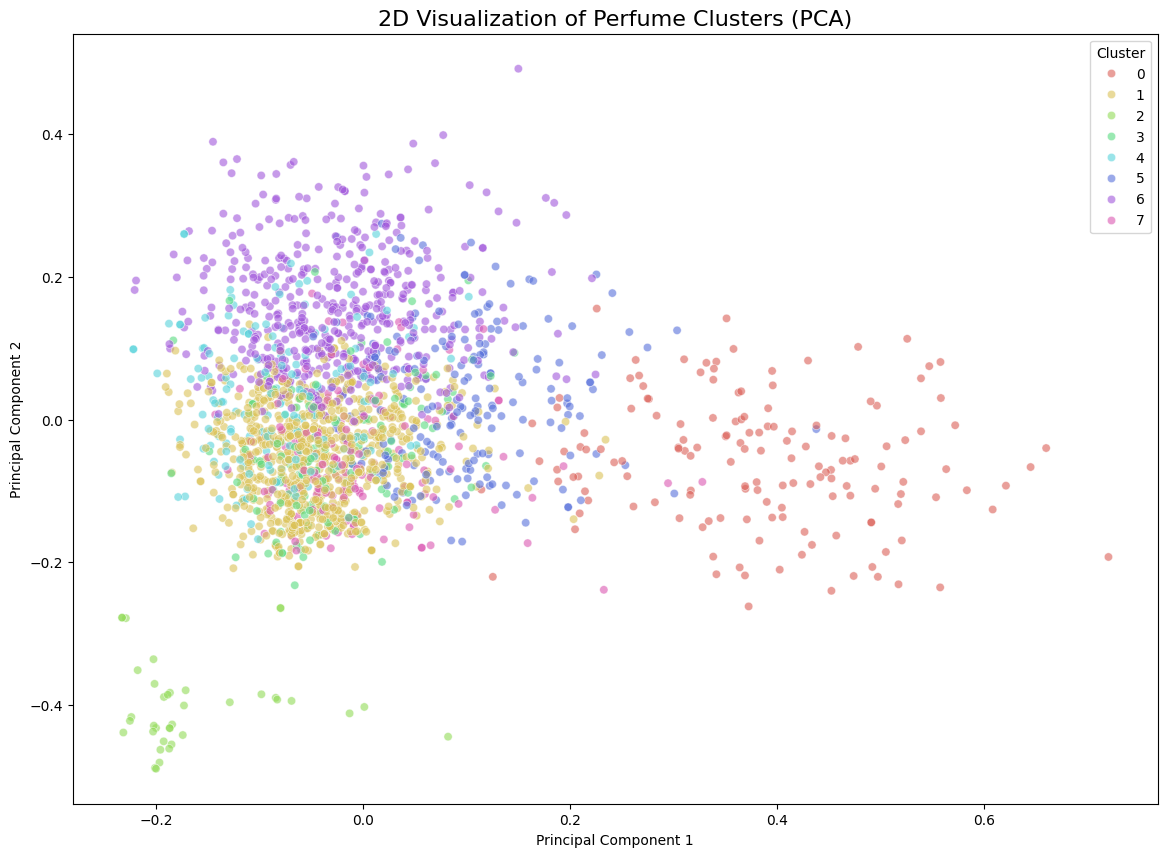

Generating Chart: Description Length vs. Scent Family (Violin Plot)...


/tmp/ipython-input-4161909138.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


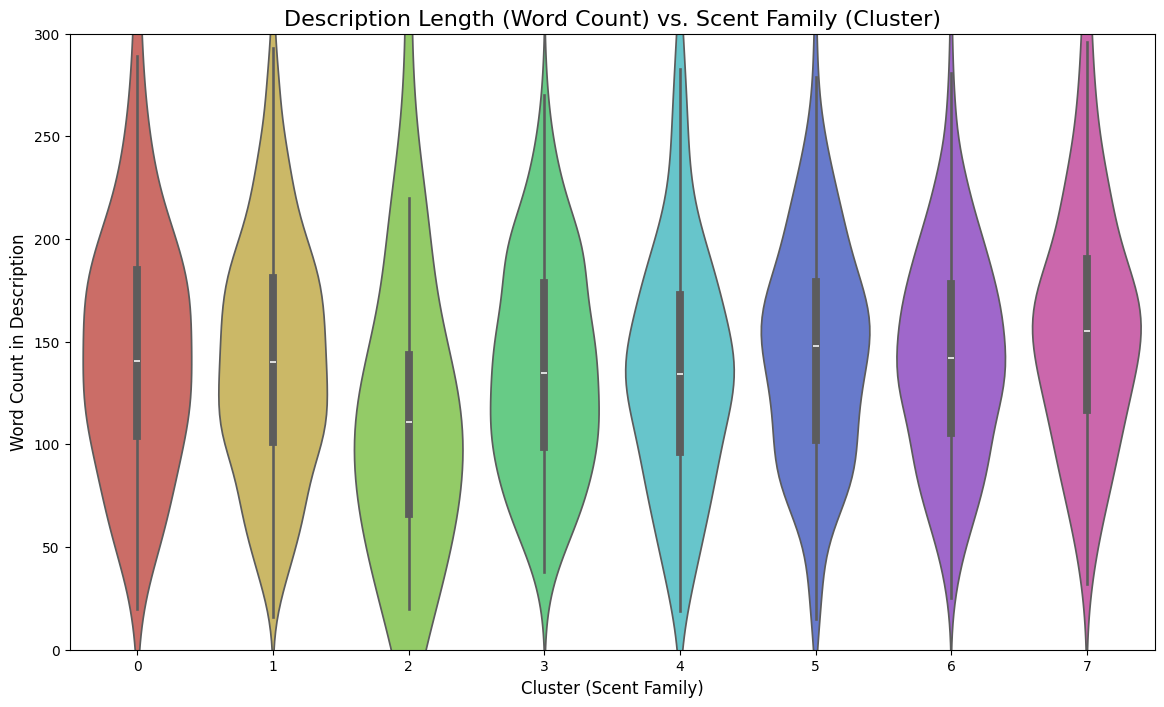


--- Clustering Section Finished ---


In [ ]:
# --- Step 3: Market Segmentation (K-Means Clustering) ---
print("Starting Clustering Process...")

# 3a. Vectorize text for clustering
tfidf_vec_cluster = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_matrix_cluster = tfidf_vec_cluster.fit_transform(df['clean_notes'])
print("TF-IDF matrix for clustering is ready.")

# 3b. Find optimal K (Elbow Method)
print("Finding optimal k (Elbow Method)...")
wcss = []
k_range = range(2, 16)
for k in k_range:
    kmeans_test = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans_test.fit(tfidf_matrix_cluster)
    wcss.append(kmeans_test.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.savefig('kmeans_elbow_plot.png')
plt.show()
print("Elbow plot saved. We will proceed with k=8.")

# 3c. Run K-Means with chosen k
SELECTED_K = 8
print(f"Running K-Means for k={SELECTED_K}...")
kmeans = KMeans(n_clusters=SELECTED_K, init='k-means++', n_init=10, random_state=42)
kmeans.fit(tfidf_matrix_cluster)
df['Cluster'] = kmeans.labels_
print("Clustering finished. 'Cluster' column added.")

# 3d. Analyze clusters - find top notes
print("\n--- Cluster Analysis: Top 5 Notes per Cluster ---")
feature_names = tfidf_vec_cluster.get_feature_names_out()
cluster_centers = kmeans.cluster_centers_
top_note_indices = cluster_centers.argsort()[:, ::-1]
for i in range(SELECTED_K):
    top_5_notes = [feature_names[idx] for idx in top_note_indices[i, :5]]
    print(f"Cluster {i}: {', '.join(top_5_notes)}")

# 3e. Feature Engineering for plots
df['desc_length'] = df['Description'].fillna('').apply(lambda x: len(x.split()))

# 3f. Plot 1: Cluster Size Distribution
print("\nGenerating Chart: Cluster Size Distribution...")
plt.figure(figsize=(10, 6))
cluster_sizes = df['Cluster'].value_counts().sort_index()
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette="viridis")
plt.title('Perfume Count Distribution per Cluster', fontsize=16)
plt.xlabel('Cluster (Scent Family)', fontsize=12)
plt.ylabel('Number of Perfumes', fontsize=12)
plt.savefig('cluster_size_distribution.png')
plt.show()

# 3g. Plot 2: Cluster Visualization (PCA)
print("Generating Chart: 2D Cluster Visualization (PCA)...")
pca = PCA(n_components=2, random_state=42)
tfidf_matrix_2d = pca.fit_transform(tfidf_matrix_cluster.toarray())
df['pca_x'] = tfidf_matrix_2d[:, 0]
df['pca_y'] = tfidf_matrix_2d[:, 1]

plt.figure(figsize=(14, 10))
sns.scatterplot(
    x='pca_x', y='pca_y', hue='Cluster', data=df,
    palette=sns.color_palette("hls", SELECTED_K),
    legend='full', alpha=0.6
)
plt.title('2D Visualization of Perfume Clusters (PCA)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('perfume_clusters_pca.png')
plt.show()

# 3h. Plot 3: Description Length vs. Cluster
print("Generating Chart: Description Length vs. Scent Family (Violin Plot)...")
plt.figure(figsize=(14, 8))
sns.violinplot(
    x='Cluster', y='desc_length', data=df,
    palette=sns.color_palette("hls", SELECTED_K)
)
plt.title('Description Length (Word Count) vs. Scent Family (Cluster)', fontsize=16)
plt.xlabel('Cluster (Scent Family)', fontsize=12)
plt.ylabel('Word Count in Description', fontsize=12)
plt.ylim(0, 300) # Limit Y-axis to see distributions clearly
plt.savefig('cluster_description_length.png')
plt.show()
print("\n--- Clustering Section Finished ---")

In [ ]:
# --- Step 4: Hybrid Recommendation System (SBERT + TF-IDF) ---
print("\n--- Starting Hybrid Model (SBERT + TF-IDF) ---")

# 4a. Model 1 (TF-IDF on 'Notes') - We already have the vectorizer
# We just need the similarity matrix
tfidf_vec_rec = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_matrix_rec = tfidf_vec_rec.fit_transform(df['clean_notes'])
cosine_sim_notes = cosine_similarity(tfidf_matrix_rec, tfidf_matrix_rec)
print("Model 1 (Notes TF-IDF) similarity matrix is ready.")

# 4b. Model 2 (SBERT on 'Description')
print("Loading SBERT model ('all-MiniLM-L6-v2')...")
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

descriptions = df['Description'].fillna('').tolist()

print("Generating SBERT embeddings for descriptions (This will take 1-2 minutes)...")
description_embeddings = sbert_model.encode(descriptions, show_progress_bar=True)
print("Description embeddings are ready.")

cosine_sim_desc = cosine_similarity(description_embeddings, description_embeddings)
print("Model 2 (Description SBERT) similarity matrix is ready.")

# 4c. Create Hybrid Model
print("Creating Hybrid Model...")
WAGA_NUTY = 0.6  # 60%
WAGA_OPISU = 0.4 # 40%
cosine_sim_hybrid = (WAGA_NUTY * cosine_sim_notes) + (WAGA_OPISU * cosine_sim_desc)
print("Hybrid similarity matrix is ready.")

# 4d. Define Recommendation Functions
indices = pd.Series(df.index, index=df['Name']).drop_duplicates()

def get_recommendations_by_matrix(perfume_name, cosine_sim_matrix, df=df, indices=indices):
    try:
        idx = indices[perfume_name]
        sim_scores = list(enumerate(cosine_sim_matrix[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11] # Get top 10 (skip self)
        perfume_indices = [i[0] for i in sim_scores]
        return df[['Name', 'Brand', 'Notes']].iloc[perfume_indices]
    except KeyError:
        return f"ERROR: Perfume '{perfume_name}' not found in database."

# 4e. Compare Models
print("\n--- Model Comparison ---")
test_name = 'Tihota Eau de Parfum' # Known for being a pure vanilla

print(f"\nRECOMMENDATIONS FOR: '{test_name}'")

print("\nModel 1 (Notes-Only TF-IDF):")
print(get_recommendations_by_matrix(test_name, cosine_sim_notes))

print("\nModel 2 (Hybrid SBERT + TF-IDF):")
print(get_recommendations_by_matrix(test_name, cosine_sim_hybrid))

print("\n--- Hybrid Model Section Finished ---")


--- Starting Hybrid Model (SBERT + TF-IDF) ---
Model 1 (Notes TF-IDF) similarity matrix is ready.
Loading SBERT model ('all-MiniLM-L6-v2')...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Generating SBERT embeddings for descriptions (This will take 1-2 minutes)...


Batches:   0%|          | 0/69 [00:00<?, ?it/s]

Description embeddings are ready.
Model 2 (Description SBERT) similarity matrix is ready.
Creating Hybrid Model...
Hybrid similarity matrix is ready.

--- Model Comparison ---

RECOMMENDATIONS FOR: 'Tihota Eau de Parfum'

Model 1 (Notes-Only TF-IDF):
                                          Name                 Brand  \
125              Muskara Phero J Eau de Parfum          Fueguia 1833   
1392                     Insulo Parfum Extrait              Jeroboam   
555            Murmure des Dieux Eau de Parfum       Une Nuit Nomade   
1033                   Ambra Extrait de Parfum              Jeroboam   
1927     Musc - Les Nombres d'Or Eau de Parfum          Mona di Orio   
889                    Rehab Extrait de Parfum        Initio Parfums   
1238  The Tragedy of Lord George Eau de Parfum           Penhaligons   
1237                      Arbole Eau de Parfum  Hiram Green Perfumes   
760            L'Homme Aux Gants Eau de Parfum          Parfums MDCI   
1395                    Miksa

In [ ]:
# --- Step 4: Hybrid Recommendation System (SBERT + TF-IDF) ---
print("\n--- Starting Hybrid Model (SBERT + TF-IDF) ---")

# 4a. Model 1 (TF-IDF on 'Notes') - We already have the vectorizer
# We just need the similarity matrix
tfidf_vec_rec = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_matrix_rec = tfidf_vec_rec.fit_transform(df['clean_notes'])
cosine_sim_notes = cosine_similarity(tfidf_matrix_rec, tfidf_matrix_rec)
print("Model 1 (Notes TF-IDF) similarity matrix is ready.")

# 4b. Model 2 (SBERT on 'Description')
print("Loading SBERT model ('all-MiniLM-L6-v2')...")
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

descriptions = df['Description'].fillna('').tolist()

print("Generating SBERT embeddings for descriptions (This will take 1-2 minutes)...")
description_embeddings = sbert_model.encode(descriptions, show_progress_bar=True)
print("Description embeddings are ready.")

cosine_sim_desc = cosine_similarity(description_embeddings, description_embeddings)
print("Model 2 (Description SBERT) similarity matrix is ready.")

# 4c. Create Hybrid Model
print("Creating Hybrid Model...")
WAGA_NUTY = 0.6  # 60%
WAGA_OPISU = 0.4 # 40%
cosine_sim_hybrid = (WAGA_NUTY * cosine_sim_notes) + (WAGA_OPISU * cosine_sim_desc)
print("Hybrid similarity matrix is ready.")

# 4d. Define Recommendation Functions
indices = pd.Series(df.index, index=df['Name']).drop_duplicates()

def get_recommendations_by_matrix(perfume_name, cosine_sim_matrix, df=df, indices=indices):
    try:
        idx = indices[perfume_name]
        sim_scores = list(enumerate(cosine_sim_matrix[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11] # Get top 10 (skip self)
        perfume_indices = [i[0] for i in sim_scores]
        return df[['Name', 'Brand', 'Notes']].iloc[perfume_indices]
    except KeyError:
        return f"ERROR: Perfume '{perfume_name}' not found in database."

# 4e. Compare Models
print("\n--- Model Comparison ---")
test_name = 'Tihota Eau de Parfum' # Known for being a pure vanilla

print(f"\nRECOMMENDATIONS FOR: '{test_name}'")

print("\nModel 1 (Notes-Only TF-IDF):")
print(get_recommendations_by_matrix(test_name, cosine_sim_notes))

print("\nModel 2 (Hybrid SBERT + TF-IDF):")
print(get_recommendations_by_matrix(test_name, cosine_sim_hybrid))

print("\n--- Hybrid Model Section Finished ---")


--- Starting Hybrid Model (SBERT + TF-IDF) ---
Model 1 (Notes TF-IDF) similarity matrix is ready.
Loading SBERT model ('all-MiniLM-L6-v2')...
Generating SBERT embeddings for descriptions (This will take 1-2 minutes)...


Batches:   0%|          | 0/69 [00:00<?, ?it/s]

Description embeddings are ready.
Model 2 (Description SBERT) similarity matrix is ready.
Creating Hybrid Model...
Hybrid similarity matrix is ready.

--- Model Comparison ---

RECOMMENDATIONS FOR: 'Tihota Eau de Parfum'

Model 1 (Notes-Only TF-IDF):
                                          Name                 Brand  \
125              Muskara Phero J Eau de Parfum          Fueguia 1833   
1392                     Insulo Parfum Extrait              Jeroboam   
555            Murmure des Dieux Eau de Parfum       Une Nuit Nomade   
1033                   Ambra Extrait de Parfum              Jeroboam   
1927     Musc - Les Nombres d'Or Eau de Parfum          Mona di Orio   
889                    Rehab Extrait de Parfum        Initio Parfums   
1238  The Tragedy of Lord George Eau de Parfum           Penhaligons   
1237                      Arbole Eau de Parfum  Hiram Green Perfumes   
760            L'Homme Aux Gants Eau de Parfum          Parfums MDCI   
1395                    Miksa

In [ ]:
# --- KROK 1: SKRYPT PRZYGOTOWUJĄCY DANE ---
print("Uruchamiam skrypt do przygotowania plików...")

import zipfile
import os
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Upewnij się, że masz zainstalowane: !pip install sentence-transformers
from sentence_transformers import SentenceTransformer

# --- 1. Wczytanie i rozpakowanie (jak zawsze) ---
zip_path = 'final_perfume_data.csv.zip'
extract_path = '/content/perfume-dataset/'
csv_path = '/content/perfume-dataset/final_perfume_data.csv'

if not os.path.exists(csv_path):
    print(f"Rozpakowuję {zip_path}...")
    if os.path.exists(zip_path):
        os.makedirs(extract_path, exist_ok=True)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
    else:
        print(f"BŁĄD: Plik {zip_path} nie istnieje. Prześlij go.")

df = pd.read_csv(csv_path, encoding='latin1')
print("Dane wczytane.")

# --- 2. Przetwarzanie tekstu (dla modelu 1) ---
df['Notes'] = df['Notes'].fillna('')
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[\d\.,]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df['clean_notes'] = df['Notes'].apply(clean_text)

# --- 3. Model 1 (TF-IDF na Nutach) ---
print("Generuję Model 1 (TF-IDF)...")
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_matrix = tfidf.fit_transform(df['clean_notes'])
cosine_sim_notes = cosine_similarity(tfidf_matrix, tfidf_matrix)

# --- 4. Model 2 (SBERT na Opisach) ---
print("Generuję Model 2 (SBERT) - to potrwa 1-2 minuty...")
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
opisy = df['Description'].fillna('').tolist()
description_embeddings = sbert_model.encode(opisy, show_progress_bar=True)
cosine_sim_desc = cosine_similarity(description_embeddings, description_embeddings)

# --- 5. Model Hybrydowy ---
print("Tworzę model hybrydowy...")
WAGA_NUTY = 0.6
WAGA_OPISU = 0.4
cosine_sim_hybrid = (WAGA_NUTY * cosine_sim_notes) + (WAGA_OPISU * cosine_sim_desc)

# --- 6. Zapisywanie plików ---
# Zapisujemy wyczyszczoną tabelę (będziemy jej potrzebować)
df.to_csv('perfumes_cleaned.csv', index=False)

# Zapisujemy naszą matrycę podobieństwa
np.save('hybrid_similarity.npy', cosine_sim_hybrid)

print("\n--- GOTOWE! ---")
print("W panelu plików po lewej stronie znajdziesz dwa nowe pliki:")
print("1. perfumes_cleaned.csv")
print("2. hybrid_similarity.npy")
print("\nPOBIERZ OBA TE PLIKI NA SWÓJ KOMPUTER (kliknij trzy kropki i 'Pobierz').")

Uruchamiam skrypt do przygotowania plików...
Dane wczytane.
Generuję Model 1 (TF-IDF)...
Generuję Model 2 (SBERT) - to potrwa 1-2 minuty...


Batches:   0%|          | 0/69 [00:00<?, ?it/s]

Tworzę model hybrydowy...

--- GOTOWE! ---
W panelu plików po lewej stronie znajdziesz dwa nowe pliki:
1. perfumes_cleaned.csv
2. hybrid_similarity.npy

POBIERZ OBA TE PLIKI NA SWÓJ KOMPUTER (kliknij trzy kropki i 'Pobierz').
